In [1]:
import sys
import os
import numpy as np
os.chdir("/home/debian/PhenPred")
import importlib
import PhenPred
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import shap
from PhenPred.vae import shap_folder, plot_folder
from PhenPred.vae.Hypers import Hypers
from PhenPred.vae.DatasetDepMap23Q2 import CLinesDatasetDepMap23Q2
import dipvae_metrics

/home/debian/miniconda3/envs/mosa/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
importlib.reload(dipvae_metrics)

<module 'dipvae_metrics' from '/home/debian/PhenPred/PhenPred/vae/DIP-VAE/dipvae_metrics.py'>

In [3]:
timestamps = ["20240727_132026", "20240727_185121", "20240728_013801", "20240728_082022", "20240728_125545", "20240728_160621", "20240728_191803", "20240728_223113", "20240729_014738", "20240729_050521", "20240729_081904", "20240729_113401", "20240729_144746", "20240730_015913", "20240730_114259", "20240730_145327", "20240730_185152", "20240730_223647", "20240731_030512", "20240731_061159", "20240731_095929", "20240731_132746", "20240731_163744", "20240731_203921", "20240731_234522", "20240801_025041", "20240801_055556", "20240801_090128", "20240801_120705", "20240801_152226", "20240801_182710", "20240802_000556", "20240802_072750", "20240802_105031", "20240802_195214", "20240803_115600", "20240804_065615", "20240804_203056", "20240804_233448", "20240805_023911", "20240805_054447", "20240805_084942", "20240805_120214", "20240806_031141", "20240806_182315", "20240807_055638", "20240807_173215", "20240808_190547"]

Val MSE and Disentanglement metric heatmaps

In [4]:
metrics = np.load(f"{plot_folder}/files/dipvae_metrics.npy")

In [5]:
np.set_printoptions(precision=7, suppress=True)
metrics

array([[ 0.       ,  0.       ,  4.304853 ,  0.1051238],
       [ 0.00001  ,  0.00001  ,  4.358926 ,  0.1035482],
       [ 0.00001  ,  0.0001   ,  4.4022941,  0.1055848],
       [ 0.00001  ,  0.001    ,  4.4860013,  0.1184541],
       [ 0.00001  ,  0.01     ,  4.6630308,  0.1324425],
       [ 0.00001  ,  0.1      ,  4.8853631,  0.1479808],
       [ 0.00001  ,  1.       ,  5.1421374,  0.1406572],
       [ 0.00001  , 10.       ,  5.5728239,  0.0880071],
       [ 0.0001   ,  0.00001  ,  4.3481829,  0.1028525],
       [ 0.0001   ,  0.0001   ,  4.3824538,  0.1099362],
       [ 0.0001   ,  0.001    ,  4.4828214,  0.1151281],
       [ 0.0001   ,  0.01     ,  4.6461899,  0.1341724],
       [ 0.0001   ,  0.1      ,  4.8808038,  0.1498483],
       [ 0.0001   , 10.       ,  5.5887553,  0.0849181],
       [ 0.001    ,  0.00001  ,  4.3247624,  0.1162179],
       [ 0.001    ,  0.0001   ,  4.3861558,  0.1039217],
       [ 0.001    ,  0.001    ,  4.4979028,  0.1139698],
       [ 0.001    ,  0.01     ,

In [6]:
# Calculate relative change compared to baseline model
metrics_minus_neutral_case = metrics[1:,[0,1]]
metrics_minus_neutral_case = np.concatenate((metrics_minus_neutral_case, (metrics[1:,[2,3]] - metrics[0,[2,3]])/metrics[0,[2,3]]), axis = 1)

In [7]:
df_mse = pd.DataFrame(metrics_minus_neutral_case[:, :3], columns=["lambda_d", "lambda_od", "Val MSE"])
df_dipvae = pd.DataFrame(
    metrics_minus_neutral_case[:, [0, 1, 3]],
    columns=["lambda_d", "lambda_od", "Disentanglement metric"],
)

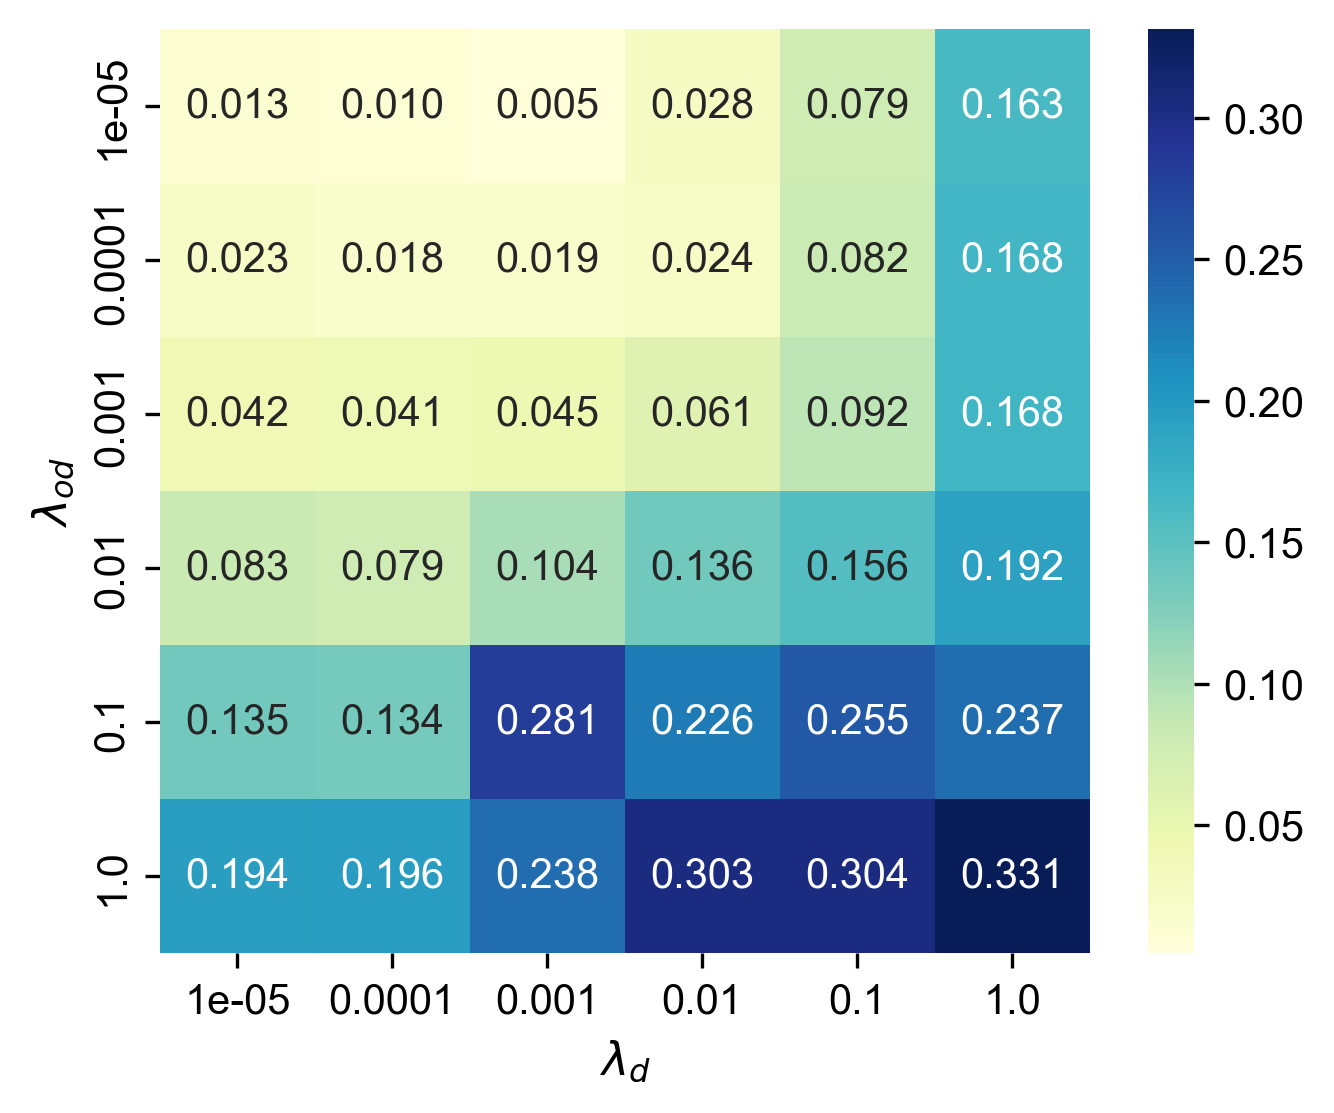

In [8]:
df_mse = pd.DataFrame(df_mse, columns=["lambda_d", "lambda_od", "Val MSE"])
pivot_table_mse = df_mse.pivot_table(values="Val MSE", index="lambda_od", columns="lambda_d")
                                     
cmap = sns.color_palette("YlGnBu", as_cmap=True)

plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table_mse.iloc[:-1, :-1], annot=True, fmt=".3f", cmap=cmap)

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Set the x and y axis labels
plt.xlabel(r"$\lambda_d$", fontsize=11) 
plt.ylabel(r"$\lambda_{od}$", fontsize=11) 

plt.show()

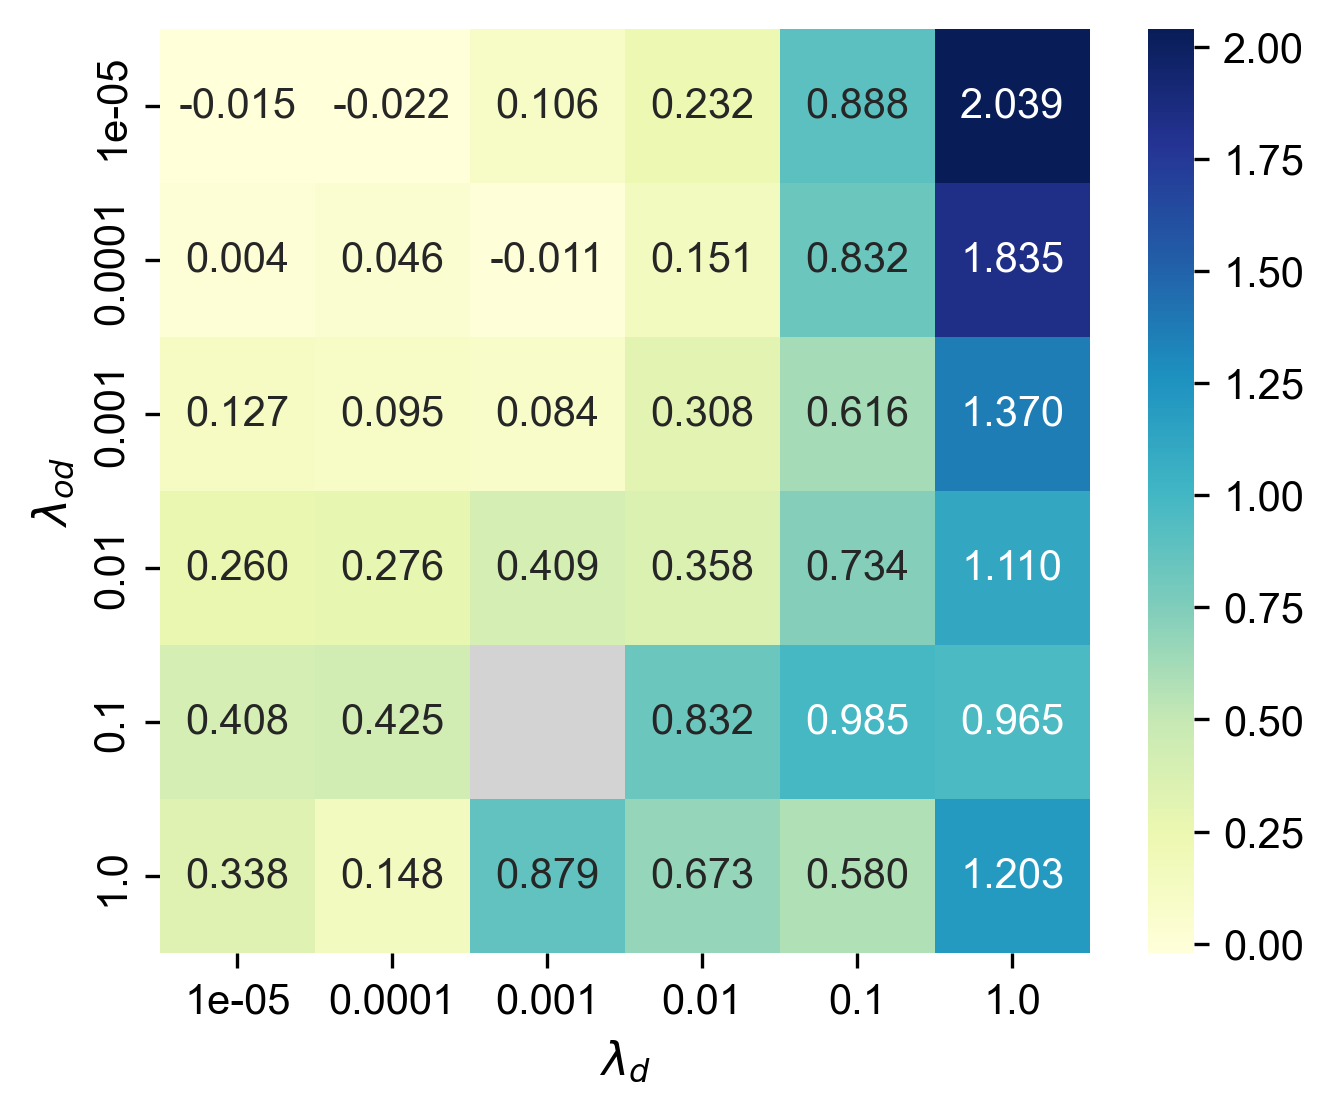

In [9]:
df_dipvae = pd.DataFrame(df_dipvae, columns=["lambda_d", "lambda_od", "Disentanglement metric"])
pivot_table_dipvae = df_dipvae.pivot_table(values="Disentanglement metric", index="lambda_od", columns="lambda_d")

cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap.set_bad(color='#d3d3d3')

plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table_dipvae.iloc[:-1, :-1], annot=True, fmt=".3f", cmap=cmap,)

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  

# Set the x and y axis labels
plt.xlabel(r"$\lambda_d$", fontsize=11) 
plt.ylabel(r"$\lambda_{od}$", fontsize=11)  

plt.show()

Independent drug response dataset MSE

In [10]:
mse_drugresponse= []

for timestamp in timestamps:
    image_path = f"{plot_folder}/drugresponse/{timestamp}_imputed_scatter_MOSA.png"
    hyperparameters = Hypers.read_hyperparameters(timestamp = timestamp)

    mse_match = dipvae_metrics.mse_new_drugresponse_dataset(image_path)
    
    if mse_match:
        mse_value = mse_match.group(1)
        if hyperparameters.get("dip_vae_type") != None:
            mse_drugresponse.append([hyperparameters["lambda_d"], hyperparameters["lambda_od"], float(mse_value)])
        else:
            mse_drugresponse.append([0, 0, float(mse_value)])
    else:
        print("MSE value not found.")

# ---- Hyperparameters
{
    "activation_function": "<not serializable>",
    "batch_norm": false,
    "batch_size": 76,
    "contrastive_neg_margin": 0.15,
    "contrastive_pos_margin": 0.85,
    "dataname": "depmap23Q2",
    "datasets": {
        "copynumber": "/home/debian/PhenPred/data/clines//cnv_summary_20230303_matrix.csv",
        "crisprcas9": "/home/debian/PhenPred/data/clines//depmap23Q2/CRISPRGeneEffect.csv",
        "drugresponse": "/home/debian/PhenPred/data/clines//drugresponse.csv",
        "metabolomics": "/home/debian/PhenPred/data/clines//metabolomics.csv",
        "methylation": "/home/debian/PhenPred/data/clines//methylation.csv",
        "proteomics": "/home/debian/PhenPred/data/clines//proteomics.csv",
        "transcriptomics": "/home/debian/PhenPred/data/clines//depmap23Q2/OmicsExpressionGenesExpectedCountProfileVoom.csv"
    },
    "feature_dropout": 0,
    "feature_miss_rate_thres": 0.85,
    "filter_features": [
        "transcriptomics",
        "crisprcas9

In [11]:
# Calculate relative change compared to baseline model
mse_drugresponse_minus_neutral_case = np.array(mse_drugresponse)[1:,[0,1]]
mse_drugresponse_minus_neutral_case = np.concatenate((mse_drugresponse_minus_neutral_case, (np.array(mse_drugresponse)[1:,[2]] - np.array(mse_drugresponse)[0,[2]])/np.array(mse_drugresponse)[0,[2]]), axis = 1)

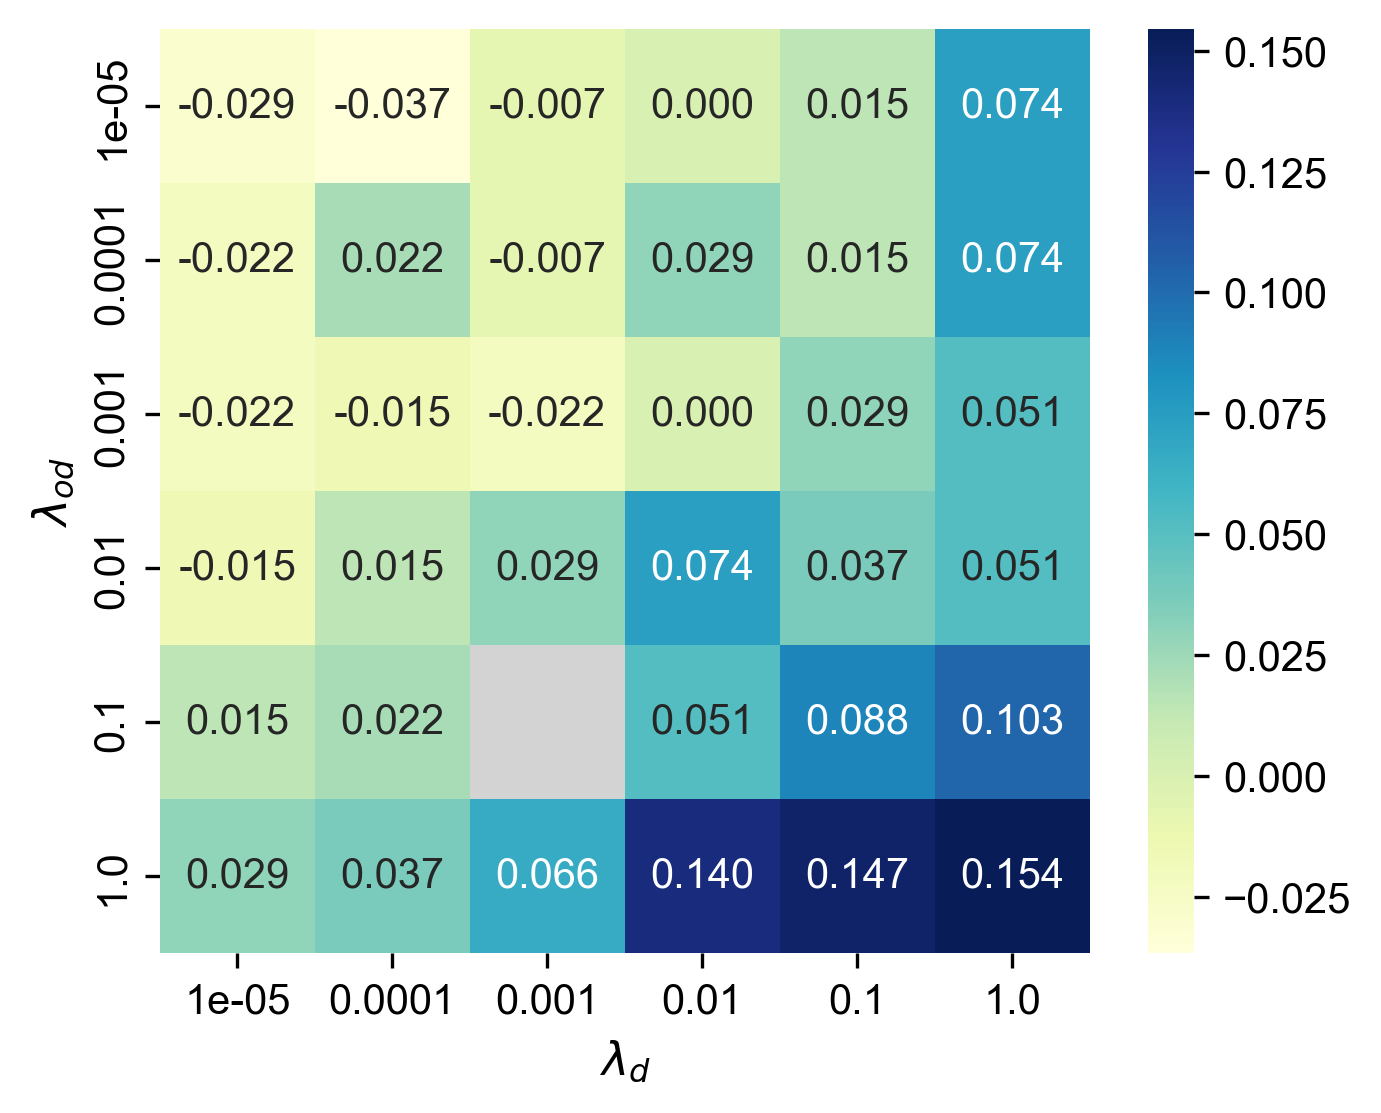

In [12]:
df_mse_drugresponse = pd.DataFrame(mse_drugresponse_minus_neutral_case, columns=["lambda_d", "lambda_od", "Drug Response MSE"])
pivot_table_drugresponse_mse = df_mse_drugresponse.pivot_table(values="Drug Response MSE", index="lambda_od", columns="lambda_d")

cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap.set_bad(color='#d3d3d3') 

plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table_drugresponse_mse.iloc[:-1, :-1], annot=True, fmt=".3f", cmap=cmap, mask=pivot_table_drugresponse_mse.iloc[:-1, :-1].isnull())

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=10) 

plt.xlabel(r"$\lambda_d$", fontsize=11) 
plt.ylabel(r"$\lambda_{od}$", fontsize=11)

plt.show()

Average Mutual Information

In [13]:
avg_mi_all = []
for timestamp in timestamps:
    vae_latent = pd.read_csv(
            f"{plot_folder}/files/{timestamp}_latent_joint.csv.gz", index_col=0
        )
    hyperparameters = Hypers.read_hyperparameters(timestamp= timestamp)

    avg_mi = dipvae_metrics.compute_avg_mutual_information(vae_latent.to_numpy())

    if hyperparameters.get("dip_vae_type") != None:
        avg_mi_all.append([hyperparameters["lambda_d"], hyperparameters["lambda_od"], avg_mi])

    else:
        avg_mi_all.append([0, 0, avg_mi])


# ---- Hyperparameters
{
    "activation_function": "<not serializable>",
    "batch_norm": false,
    "batch_size": 76,
    "contrastive_neg_margin": 0.15,
    "contrastive_pos_margin": 0.85,
    "dataname": "depmap23Q2",
    "datasets": {
        "copynumber": "/home/debian/PhenPred/data/clines//cnv_summary_20230303_matrix.csv",
        "crisprcas9": "/home/debian/PhenPred/data/clines//depmap23Q2/CRISPRGeneEffect.csv",
        "drugresponse": "/home/debian/PhenPred/data/clines//drugresponse.csv",
        "metabolomics": "/home/debian/PhenPred/data/clines//metabolomics.csv",
        "methylation": "/home/debian/PhenPred/data/clines//methylation.csv",
        "proteomics": "/home/debian/PhenPred/data/clines//proteomics.csv",
        "transcriptomics": "/home/debian/PhenPred/data/clines//depmap23Q2/OmicsExpressionGenesExpectedCountProfileVoom.csv"
    },
    "feature_dropout": 0,
    "feature_miss_rate_thres": 0.85,
    "filter_features": [
        "transcriptomics",
        "crisprcas9

In [14]:
# Calculate relative change compared to baseline model
avg_mi_all_minus_neutral_case = np.array(avg_mi_all)[1:,[0,1]]
avg_mi_all_minus_neutral_case = np.concatenate((avg_mi_all_minus_neutral_case, (np.array(avg_mi_all)[1:,[2]] - np.array(avg_mi_all)[0,[2]])/np.array(avg_mi_all)[0,[2]]), axis = 1)

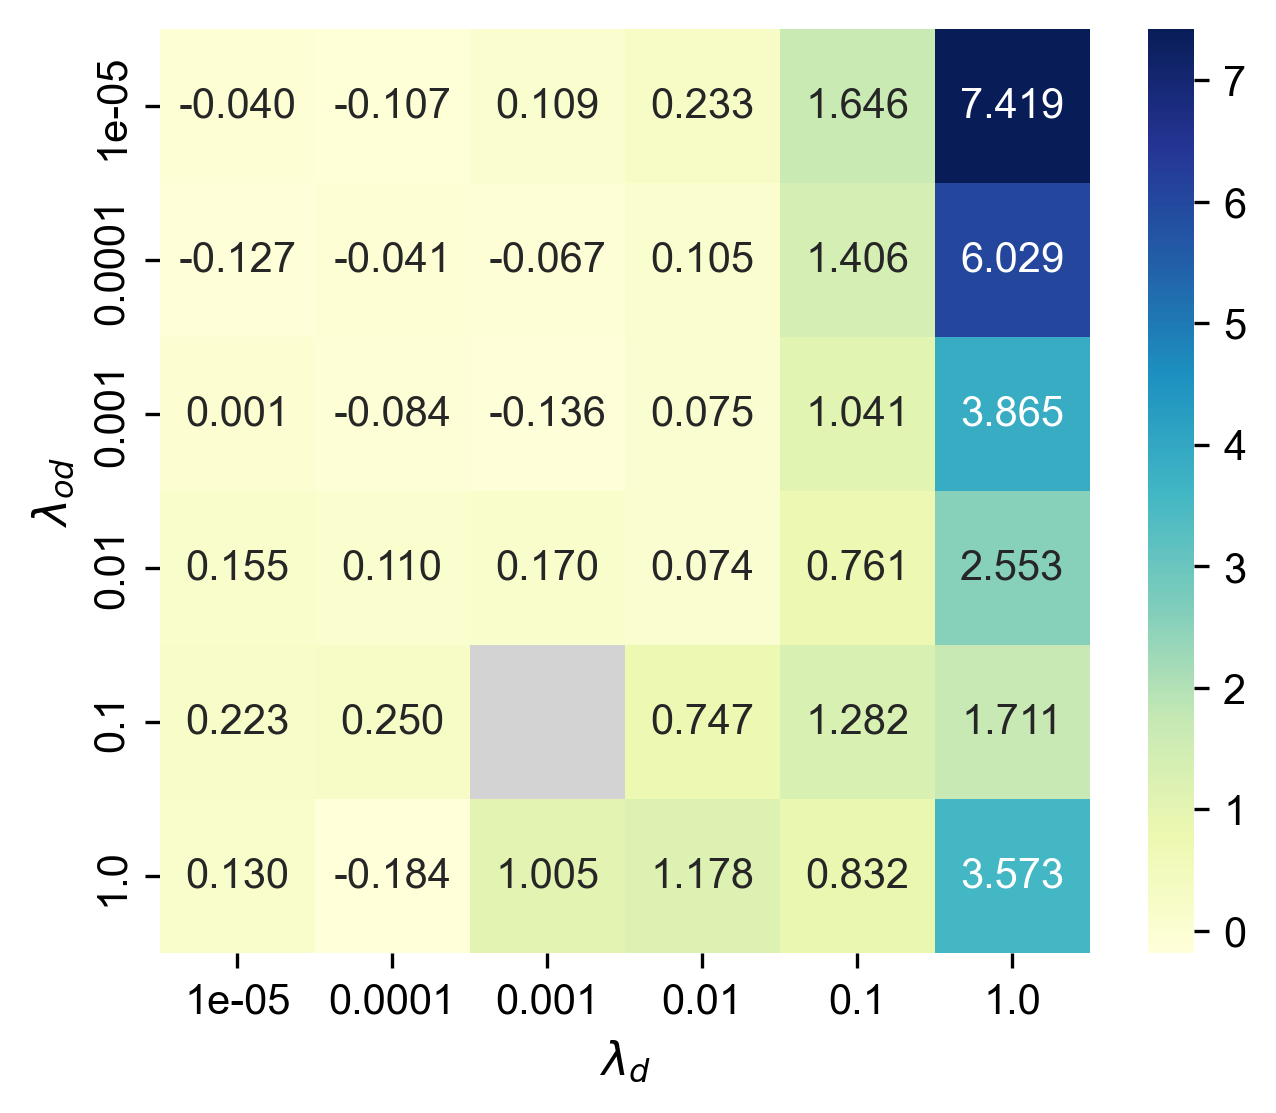

In [15]:
df_avg_mi = pd.DataFrame(avg_mi_all_minus_neutral_case, columns=["lambda_d", "lambda_od", "Average MI"])
pivot_table_avg_mi = df_avg_mi.pivot_table(values="Average MI", index="lambda_od", columns="lambda_d")

cmap = sns.color_palette("YlGnBu", as_cmap=True)
cmap.set_bad(color='#d3d3d3')

plt.figure(figsize=(5, 4))
sns.heatmap(pivot_table_avg_mi.iloc[:-1,:-1], annot=True, fmt=".3f", cmap= cmap)

plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=10) 

# Set the x and y axis labels
plt.xlabel(r"$\lambda_d$", fontsize=11)  
plt.ylabel(r"$\lambda_{od}$", fontsize=11)

plt.show()